<a href="https://colab.research.google.com/github/Deon62/FUTURE_ML_01/blob/main/Spotify_songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# spotify song classification into 3 moods happy...sad and energetic with ML

# **Imports and Data Load**

In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('/content/dataset.csv')

Data visualization

In [19]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [18]:
df.shape

(114000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77911 entries, 0 to 77910
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        77911 non-null  int64  
 1   track_id          77911 non-null  object 
 2   artists           77910 non-null  object 
 3   album_name        77910 non-null  object 
 4   track_name        77910 non-null  object 
 5   popularity        77911 non-null  int64  
 6   duration_ms       77911 non-null  int64  
 7   explicit          77911 non-null  bool   
 8   danceability      77911 non-null  float64
 9   energy            77911 non-null  float64
 10  key               77911 non-null  int64  
 11  loudness          77911 non-null  float64
 12  mode              77911 non-null  int64  
 13  speechiness       77911 non-null  float64
 14  acousticness      77911 non-null  float64
 15  instrumentalness  77911 non-null  float64
 16  liveness          77911 non-null  float6

In [20]:
df.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
df['track_genre'].value_counts().head(10)

,count
track_genre,
acoustic,1000
hardstyle,1000
indie-pop,1000
indian,1000
idm,1000
house,1000
honky-tonk,1000
hip-hop,1000
heavy-metal,1000


# Data preprocessing

In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. Drop Unnecessary Columns
df.drop(columns=["Unnamed: 0", "track_id", "track_name", "album_name"], inplace=True)

In [22]:
# Handle Missing Values
df["artists"].fillna("Unknown", inplace=True)
df["track_genre"].fillna("Unknown", inplace=True)
df.dropna(inplace=True)

<ipython-input-22-e60ecef38b4e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["artists"].fillna("Unknown", inplace=True)
<ipython-input-22-e60ecef38b4e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [23]:
df.isnull().sum()

,0
artists,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17642 entries, 0 to 17641
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           17642 non-null  object 
 1   popularity        17642 non-null  float64
 2   duration_ms       17642 non-null  float64
 3   explicit          17642 non-null  object 
 4   danceability      17642 non-null  float64
 5   energy            17642 non-null  float64
 6   key               17642 non-null  float64
 7   loudness          17642 non-null  float64
 8   mode              17642 non-null  float64
 9   speechiness       17642 non-null  float64
 10  acousticness      17642 non-null  float64
 11  instrumentalness  17642 non-null  float64
 12  liveness          17642 non-null  float64
 13  valence           17642 non-null  float64
 14  tempo             17642 non-null  float64
 15  time_signature    17642 non-null  float64
 16  track_genre       17642 non-null  object 
dty

In [24]:
df['explicit'] = df['explicit'].astype(int)  # Convert boolean to int
df['mode'] = df['mode'].astype(int)  # Already 0/1, but ensure integer type

In [25]:
df.tail()

,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,Rainy Lullaby,21,384999,0,0.172,0.235,5,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,22,385000,0,0.174,0.117,0,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,22,271466,0,0.629,0.329,0,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,41,283893,0,0.587,0.506,7,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,Cesária Evora,22,241826,0,0.526,0.487,1,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


In [26]:
scaler = StandardScaler()
num_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
df[num_features] = scaler.fit_transform(df[num_features])

In [27]:
df.tail()

,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,Rainy Lullaby,21,384999,0,-2.274962,-1.615656,5,-1.617326,1,-0.401507,0.977652,2.493755,-0.668426,-1.697787,0.128333,5,world-music
113996,Rainy Lullaby,22,385000,0,-2.263437,-2.084789,0,-2.000082,0,-0.421369,2.042245,2.648817,-0.570200,-1.693545,-1.231195,4,world-music
113997,Cesária Evora,22,271466,0,0.358416,-1.241940,0,-0.524135,0,-0.403399,1.660315,-0.504112,-0.681033,1.037306,0.341255,4,world-music
113998,Michael W. Smith,41,283893,0,0.116398,-0.538241,7,-0.522942,1,-0.519731,0.198754,-0.504112,0.296502,-0.235548,0.460742,4,world-music
113999,Cesária Evora,22,241826,0,-0.235103,-0.613780,1,-0.386740,0,-0.114933,1.100952,-0.504112,-0.652668,0.902306,-1.432709,4,world-music


In [25]:
print(num_features)

['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


# creating mood column to classify songs.

In [28]:

def classify_mood(row):
    if row['valence'] < -0.5 and row['energy'] < -0.5 and row['acousticness'] > 0.5:
        return 0  # Sad
    elif row['valence'] > 0.3 and row['danceability'] > 0.3 and row['energy'] > -0.2:
        return 1  # Happy
    elif row['energy'] > 0.5 and row['loudness'] > 0.5 and row['tempo'] > 0.3:
        return 2  # Energetic
    else:
        return 1  # Default to Happy if it doesn't strongly fit any category

# Apply mood classification
df['mood'] = df.apply(classify_mood, axis=1)

# Save the dataset with mood labels
df.to_csv("preprocessed_spotify_with_moods.csv", index=False)

# Check distribution of moods
print(df['mood'].value_counts())
print("✅ Mood labels successfully created!")


mood
1    90036
0    13308
2    10656
Name: count, dtype: int64
✅ Mood labels successfully created!


# create and load the new DataFrame for the processed Data

In [29]:
data = pd.read_csv('/content/preprocessed_spotify_with_moods.csv')

In [30]:
data.head()

,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,mood
0,Gen Hoshino,73,230666,0,0.629244,-0.717148,1,0.300828,0,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863,4,acoustic,1
1,Ben Woodward,55,149610,0,-0.845908,-1.889980,1,-1.784744,1,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717,4,acoustic,0
2,Ingrid Michaelson;ZAYN,57,210826,0,-0.742186,-1.122669,0,-0.293288,1,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312,4,acoustic,1
3,Kina Grannis,71,201933,0,-1.733304,-2.312994,0,-2.039252,1,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859,3,acoustic,0
4,Chord Overstreet,82,198853,0,0.295030,-0.788711,2,-0.282750,1,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348,4,acoustic,1


In [31]:
data.shape

(114000, 18)

In [32]:
data.isnull().sum()

,0
artists,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0


In [33]:
data['mood'].value_counts()

,count
mood,
1,90036
0,13308
2,10656


In [33]:
####   1 ----> Happy
####   2 ----> energetic
####   0 ----> sad


# **Split data ready for model training**

In [34]:
X = data.drop(columns=['mood'])  # Drop the mood column from features
y = data['mood']  # Target variable

# Ensure correct data types (if needed)
X = X.select_dtypes(include=['number'])  # Keep only numerical features

In [35]:
# First, split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Now, split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display dataset sizes
print(f"✅ Data Loaded & Split Successfully!")
print(f"Training Set: {X_train.shape[0]} samples")
print(f"Validation Set: {X_val.shape[0]} samples")
print(f"Test Set: {X_test.shape[0]} samples")


✅ Data Loaded & Split Successfully!
Training Set: 79800 samples
Validation Set: 17100 samples
Test Set: 17100 samples


# **Model Training**

# will be using the XGB model

Imports

In [36]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from xgboost import callback

Model intialization

In [37]:
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    random_state=42
)

In [54]:
#early_stop = callback.EarlyStopping(rounds=10) ---> this can be a good paremeter if using the compatible model version

Fit the model

In [39]:
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    #eval_metric="mlogloss",  # Explicitly set the evaluation metric
    verbose=True
)

[0]	validation_0-mlogloss:0.70282
[1]	validation_0-mlogloss:0.48081
[2]	validation_0-mlogloss:0.33893
[3]	validation_0-mlogloss:0.24295
[4]	validation_0-mlogloss:0.17604
[5]	validation_0-mlogloss:0.12851
[6]	validation_0-mlogloss:0.09422
[7]	validation_0-mlogloss:0.06933
[8]	validation_0-mlogloss:0.05113
[9]	validation_0-mlogloss:0.03778
[10]	validation_0-mlogloss:0.02797
[11]	validation_0-mlogloss:0.02073
[12]	validation_0-mlogloss:0.01539
[13]	validation_0-mlogloss:0.01143
[14]	validation_0-mlogloss:0.00850
[15]	validation_0-mlogloss:0.00633
[16]	validation_0-mlogloss:0.00472
[17]	validation_0-mlogloss:0.00352
[18]	validation_0-mlogloss:0.00263
[19]	validation_0-mlogloss:0.00197
[20]	validation_0-mlogloss:0.00148
[21]	validation_0-mlogloss:0.00112
[22]	validation_0-mlogloss:0.00085
[23]	validation_0-mlogloss:0.00065
[24]	validation_0-mlogloss:0.00050
[25]	validation_0-mlogloss:0.00038
[26]	validation_0-mlogloss:0.00030
[27]	validation_0-mlogloss:0.00024
[28]	validation_0-mlogloss:0.0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=3, num_parallel_tree=None, objective='multi:softmax', ...)

# Model prediction

In [55]:
# Predict on the test set
y_pred = model.predict(X_test)



In [42]:
#print predictions and real values in a table with label meaning
print(pd.DataFrame({'Predicted': y_pred, 'Actual': y_test}))


        Predicted  Actual
88204           1       1
91951           1       1
26307           1       1
111881          1       1
9960            1       1
...           ...     ...
99225           1       1
99365           0       0
61117           2       2
59977           0       0
106625          1       1

[17100 rows x 2 columns]


# **Model Evaluation**

In [43]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Model Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))


🎯 Model Accuracy: 1.0000

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      1.00      1.00     13506
           2       1.00      1.00      1.00      1598

    accuracy                           1.00     17100
   macro avg       1.00      1.00      1.00     17100
weighted avg       1.00      1.00      1.00     17100



In [56]:
#evaluate with validation set
y_val_pred = model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"\n🎯 Model Accuracy on Validation Set: {accuracy_val:.4f}")


🎯 Model Accuracy on Validation Set: 1.0000


In [57]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on test set
y_test_pred = model.predict(X_test)

# Print the classification report and accuracy score
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

print("Test Set Accuracy: ", accuracy_score(y_test, y_test_pred))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      1.00      1.00     13506
           2       1.00      1.00      1.00      1598

    accuracy                           1.00     17100
   macro avg       1.00      1.00      1.00     17100
weighted avg       1.00      1.00      1.00     17100

Test Set Accuracy:  1.0


In [58]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")


Cross-Validation Scores: [1.         0.99993734 0.99987469 0.99987469 0.99993734]
Mean Cross-Validation Score: 0.9999248120300752


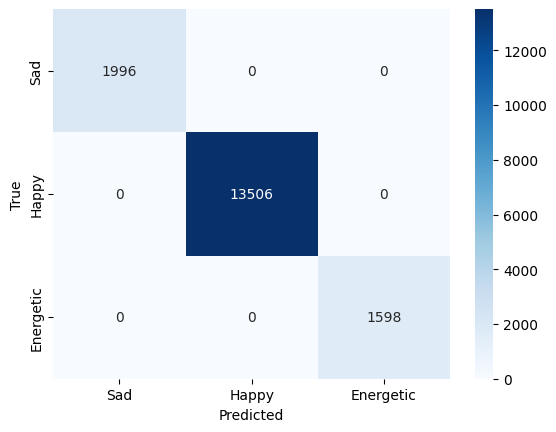

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sad', 'Happy', 'Energetic'], yticklabels=['Sad', 'Happy', 'Energetic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **Saving Model For later use**

In [44]:
import joblib
import json

# filenames
model_filename = "xgboost_mood_classifier.pkl"
columns_filename = "feature_columns.json"

# Save the trained XGBoost model
joblib.dump(model, model_filename)
print(f"✅ Model saved as {model_filename}")

# Save the feature column names (excluding target column 'mood')
feature_columns = list(X_train.columns)

with open(columns_filename, "w") as f:
    json.dump(feature_columns, f)
print(f"✅ Feature columns saved as {columns_filename}")


✅ Model saved as xgboost_mood_classifier.pkl
✅ Feature columns saved as feature_columns.json


# **Load saved Model**

In [46]:
# Load the saved model
loaded_model = joblib.load(model_filename)
print("✅ Model loaded successfully!")

# Load the feature columns
with open(columns_filename, "r") as f:
    loaded_feature_columns = json.load(f)
print(f"✅ Feature columns loaded: {loaded_feature_columns}")


✅ Model loaded successfully!
✅ Feature columns loaded: ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


In [48]:
# Load and print feature columns used in training
with open("feature_columns.json", "r") as f:
    loaded_feature_columns = json.load(f)

print("📌 Features Used in Model Training:", loaded_feature_columns)


📌 Features Used in Model Training: ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


# **Sample Data to use and test model prediction**

In [49]:
new_song = {
    "popularity": 50,  # Default or estimated value
    "duration_ms": 210000,  # Average song duration in milliseconds
    "explicit": 0,  # 0 (clean), 1 (explicit)
    "danceability": 0.75,
    "energy": 0.85,
    "key": 5,  # Musical key (0-11)
    "loudness": -5.3,
    "mode": 1,  # 1 (major), 0 (minor)
    "speechiness": 0.05,
    "acousticness": 0.10,
    "instrumentalness": 0.00,
    "liveness": 0.20,
    "valence": 0.90,
    "tempo": 120.0,
    "time_signature": 4  # Usually 4/4
}


In [50]:
import pandas as pd

def classify_song(new_song_data, model, feature_columns):
    """
    Classifies a song into a mood category using the trained XGBoost model.

    Parameters:
        new_song_data (dict): Dictionary containing song features.
        model (XGBClassifier): The trained XGBoost model.
        feature_columns (list): The selected feature columns used in training.

    Returns:
        str: Predicted mood category.
    """
    # Convert new song data into DataFrame
    song_df = pd.DataFrame([new_song_data])

    # Ensure all required columns are present
    for col in feature_columns:
        if col not in song_df.columns:
            print(f"⚠️ Missing feature: {col}. Filling with default value 0.")
            song_df[col] = 0  # Default value (adjust as needed)

    # Keep only relevant columns
    song_df = song_df[feature_columns]

    # Predict mood
    predicted_mood = model.predict(song_df)[0]

    return predicted_mood


In [51]:
predicted_mood = classify_song(new_song, loaded_model, loaded_feature_columns)
print(f"🎵 Predicted Mood: {predicted_mood}")


🎵 Predicted Mood: 1


In [53]:
# Define the mapping of label indexes to mood names
mood_mapping = {0: "sad", 1: "happy", 2: "energetic"}

# Function to classify the song and display the true and predicted moods
def classify_song(new_song_data, model, feature_columns, true_mood=None):
    """
    Classifies a song into a mood category and compares it with the true mood.

    Parameters:
        new_song_data (dict): Dictionary containing song features.
        model (XGBClassifier): The trained XGBoost model.
        feature_columns (list): The selected feature columns used in training.
        true_mood (str, optional): The true mood of the song.

    Returns:
        str: Predicted mood category and true mood comparison.
    """
    # Convert new song data into DataFrame
    song_df = pd.DataFrame([new_song_data])

    # Ensure all required columns are present
    for col in feature_columns:
        if col not in song_df.columns:
            print(f"⚠️ Missing feature: {col}. Filling with default value 0.")
            song_df[col] = 0  # Default value (adjust as needed)

    # Keep only relevant columns
    song_df = song_df[feature_columns]

    # Predict mood
    predicted_label = model.predict(song_df)[0]

    # Map the predicted label to its corresponding mood
    predicted_mood = mood_mapping.get(predicted_label, "Unknown Mood")

    # Compare with true mood if available
    if true_mood:
        print(f"True Mood: {true_mood}")

    print(f"Predicted Mood: {predicted_mood} (Predicted label: {predicted_label})")

    # Return the predicted mood
    return predicted_mood

# Example usage:
new_song = {
    "popularity": 50,
    "duration_ms": 210000,
    "explicit": 0,
    "danceability": 0.75,
    "energy": 0.85,
    "key": 5,
    "loudness": -5.3,
    "mode": 1,
    "speechiness": 0.05,
    "acousticness": 0.10,
    "instrumentalness": 0.00,
    "liveness": 0.20,
    "valence": 0.90,
    "tempo": 120.0,
    "time_signature": 4
}

# Predicted mood and comparison with true mood
predicted_mood = classify_song(new_song, loaded_model, loaded_feature_columns, true_mood="happy")


True Mood: happy
Predicted Mood: happy (Predicted label: 1)


# below is a link to the model report

https://1drv.ms/w/c/25a1bba9e864bcf3/EZvm7j9zfyhIoeIZ0vDoKdoBs9kbpifQNuyRcEQ6qA5gIA?e=gR0ide